# Tugas Jobsheet 02 - Regression

- NIM: 2041720029
- Nama: Ony Novianti
- Kelas: TI-3A

## Persiapan Data

In [60]:
# Import Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read Data
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Dari data diatas terlihat bahwa 
1. R&D Spend, Administration, dan Marketing Spend adalah variabel independent
2. Profit adalah variabel dependent

In [61]:
# info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Mendapatkan Multiple Linear Regression Versi 1

Untuk mengetahui hubungan yang ada dari :
1. R&D Spend dan Profit
2. Administration dan Profit
3. Marketing Spend dan Profit

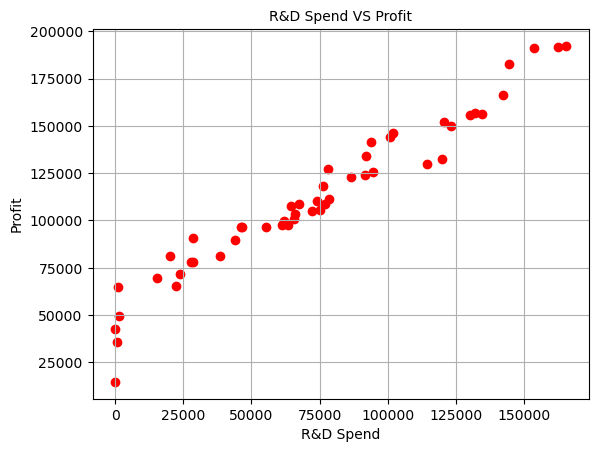

In [62]:
df = pd.DataFrame(data)

plt.scatter(df['R&D Spend'], df['Profit'], color='red')
plt.title('R&D Spend VS Profit', fontsize=10)
plt.xlabel('R&D Spend', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.grid(True)
plt.show()

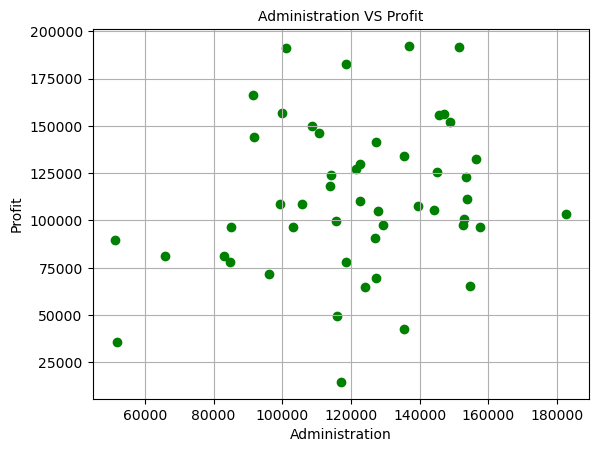

In [63]:
plt.scatter(df['Administration'], df['Profit'], color='green')
plt.title('Administration VS Profit', fontsize=10)
plt.xlabel('Administration', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.grid(True)
plt.show()

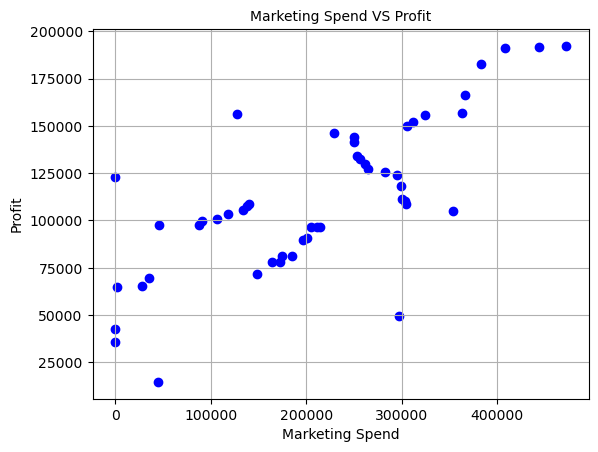

In [64]:
plt.scatter(df['Marketing Spend'], df['Profit'], color='blue')
plt.title('Marketing Spend VS Profit', fontsize=10)
plt.xlabel('Marketing Spend', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.grid(True)
plt.show()

### Performing Multiple Linear Regression

1. Dengan menggunakan sklearn

In [65]:
# Mengatur x dan y

x = df[['R&D Spend','Administration','Marketing Spend']]
y = df['Profit']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 50122.192989865274
Coefficients: 
 [ 0.80571505 -0.02681597  0.02722806]


2. Dengan menggunakan statsmodels

In [66]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        10:52:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353     

Bisa dilihat bahwa nilai const pada statsmodel dan nilai intercept pada sklearn sama

## Mendapatkan Multiple Linear Regression Versi 2

In [67]:
# Data yang akan digunakan
x = data.iloc[:, :-1].values # Dependent variable
y = data.iloc[:, -1].values  # Independent variable

In [68]:
# Proses Encoding data State
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [69]:
# Training set dan Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [70]:
# Training multiple linear regression di training set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict test result
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
